# Visualization of Illinois Census from 2010-2019


## Initialization

In [3]:
#import libraries
import pandas as pd
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import numpy as np
pd.options.mode.chained_assignment = None
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#read csv
df = pd.read_csv('SUB-IP-EST2019-ANNRES-17.csv')

In [5]:
df

,Geographic Area,Census(04/01/10),Estimates Base(04/01/10),2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,"Abingdon city, Illinois",3319,3286,3285,3273,3242,3226,3212,3171,3141,3117,3073,3051
1,"Addieville village, Illinois",252,252,252,248,253,249,247,245,245,240,241,238
2,"Addison village, Illinois",36942,37084,37134,37319,37409,37493,37432,37339,37104,36946,36696,36482
3,"Adeline village, Illinois",85,85,85,84,84,83,82,82,81,81,80,80
4,"Albany village, Illinois",891,903,905,901,891,891,887,888,883,874,871,863
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1293,"Yale village, Illinois",86,86,86,86,86,85,85,85,85,84,85,85
1294,"Yates City village, Illinois",693,691,691,687,683,679,678,670,667,661,655,652
1295,"Yorkville city, Illinois",16921,16950,17053,17311,17555,17837,18181,18474,18860,19398,20092,20613
1296,"Zeigler city, Illinois",1801,1801,1803,1798,1789,1772,1766,1761,1745,1740,1722,1712


In [6]:
#check column types
df.dtypes

Geographic Area             object
Census(04/01/10)             int64
Estimates Base(04/01/10)     int64
2010                         int64
2011                         int64
2012                         int64
2013                         int64
2014                         int64
2015                         int64
2016                         int64
2017                         int64
2018                         int64
2019                         int64
dtype: object

In [7]:
#create a new column and categorize areas into city as 1 and non_city as 0
df['City'] = df['2019'].copy()
for i in range(len(df)):
    if ('city' in df.loc[i, 'Geographic Area']):
        df['City'][i] = 1;
    else:
        df['City'][i] = 0;
    
df.sample(3)

,Geographic Area,Census(04/01/10),Estimates Base(04/01/10),2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,City
1209,"Virginia city, Illinois",1611,1615,1614,1611,1587,1569,1543,1514,1496,1475,1456,1435,1
20,"Alton city, Illinois",27865,27932,27898,27702,27505,27380,27194,27001,26865,26707,26467,26208,1
337,"East Moline city, Illinois",21302,21311,21313,21405,21558,21649,21555,21335,21140,20963,20771,20645,1


In [8]:
#create a new column and calculate net change from July 1st of 2010 to 2019
df['Net Change'] = df['City'].copy()
for i in range(len(df)):
    df.loc[i,'Net Change'] = df.loc[i,'2019'] - df.loc[i,'2010']
    
df.sample(3)

,Geographic Area,Census(04/01/10),Estimates Base(04/01/10),2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,City,Net Change
933,"Pinckneyville city, Illinois",5648,5650,5644,5679,5398,5407,5437,5528,5456,5438,5412,5372,1,-272
589,"Kangley village, Illinois",251,251,251,250,248,244,242,240,239,235,234,233,0,-18
490,"Hanna City village, Illinois",1225,1238,1236,1239,1242,1253,1246,1240,1231,1216,1202,1192,0,-44


In [9]:
#create a new column and calculate net change precent from July 1st of 2010 to 2019
df['Net Change %'] = df['Net Change'].copy()
for i in range(len(df)):
    df.loc[i,'Net Change %'] = (df.loc[i,'Net Change']/df.loc[i,'2010'] * 100).round(2)
    
df.sample(3)

,Geographic Area,Census(04/01/10),Estimates Base(04/01/10),2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,City,Net Change,Net Change %
188,"Carol Stream village, Illinois",39711,39541,39587,39818,40018,40148,40171,40152,39945,39813,39507,39203,0,-384,-0.97
801,"Mundelein village, Illinois",31064,30986,31037,31097,31118,31287,31459,31476,31424,31339,31183,31051,0,14,0.05
428,"Gays village, Illinois",281,281,281,280,276,274,272,270,263,264,261,254,0,-27,-9.61


In [10]:
#split df into two dataframes: city and non_city
city = df[df['City'] == 1]
non_city = df[df['City'] == 0]

In [11]:
city.sample(3)

,Geographic Area,Census(04/01/10),Estimates Base(04/01/10),2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,City,Net Change,Net Change %
960,"Prophetstown city, Illinois",2080,2078,2077,2066,2044,2032,2007,2001,1986,1968,1950,1939,1,-138,-6.64
1296,"Zeigler city, Illinois",1801,1801,1803,1798,1789,1772,1766,1761,1745,1740,1722,1712,1,-91,-5.05
597,"Keithsburg city, Illinois",609,609,608,607,603,596,592,586,578,582,582,580,1,-28,-4.61


In [12]:
non_city.sample(3)

,Geographic Area,Census(04/01/10),Estimates Base(04/01/10),2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,City,Net Change,Net Change %
504,"Hawthorn Woods village, Illinois",7663,7770,7788,7787,7792,7841,7885,7967,8178,8384,8522,8666,0,878,11.27
87,"Bellflower village, Illinois",357,359,359,360,359,362,357,352,351,349,347,344,0,-15,-4.18
34,"Argenta village, Illinois",947,939,941,940,932,926,917,905,900,890,881,877,0,-64,-6.80


## Analysis

In [13]:
#top 3 most populous cities in 2019
city.nlargest(3, '2019')

,Geographic Area,Census(04/01/10),Estimates Base(04/01/10),2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,City,Net Change,Net Change %
219,"Chicago city, Illinois",2695598,2695652,2697477,2708114,2719141,2725731,2727066,2724344,2716723,2711069,2701423,2693976,1,-3501,-0.13
54,"Aurora city, Illinois",197899,197975,198207,199150,199648,199803,200189,200315,200799,200391,199199,197757,1,-450,-0.23
804,"Naperville city, Illinois",141853,142170,142402,143205,144017,144892,146193,146975,147192,147619,148090,148449,1,6047,4.25


In [14]:
#top 3 most populous non-cities in 2019
non_city.nlargest(3,'2019')

,Geographic Area,Census(04/01/10),Estimates Base(04/01/10),2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,City,Net Change,Net Change %
225,"Cicero town, Illinois",83891,84241,84267,84438,84569,84601,84397,83884,83219,82399,81477,80796,0,-3471,-4.12
36,"Arlington Heights village, Illinois",75101,75185,75252,75528,75918,76116,76145,75987,75795,75473,75116,74760,0,-492,-0.65
114,"Bolingbrook village, Illinois",73366,73365,73475,73789,73949,73909,74032,74142,74383,75003,75043,74545,0,1070,1.46


In [15]:
#top 3 least populous cities in 2019
city.nsmallest(3,'2019')

,Geographic Area,Census(04/01/10),Estimates Base(04/01/10),2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,City,Net Change,Net Change %
808,"Nason city, Illinois",236,236,235,235,237,236,235,234,235,234,233,233,1,-2,-0.85
888,"Orient city, Illinois",358,358,358,358,357,354,354,351,349,348,345,343,1,-15,-4.19
43,"Ashley city, Illinois",536,536,535,528,527,517,515,510,506,495,495,490,1,-45,-8.41


In [16]:
#top 3 least populous non-cities in 2019
non_city.nsmallest(3,'2019')

,Geographic Area,Census(04/01/10),Estimates Base(04/01/10),2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,City,Net Change,Net Change %
594,"Kaskaskia village, Illinois",14,14,14,14,14,13,13,13,13,13,13,13,0,-1,-7.14
1189,"Valley City village, Illinois",13,13,13,13,13,13,13,13,12,12,13,13,0,0,0.00
1163,"Time village, Illinois",23,23,23,23,23,22,22,22,22,22,22,22,0,-1,-4.35


In [17]:
#top 3 cities with most net gain
city.nlargest(3,'Net Change')

,Geographic Area,Census(04/01/10),Estimates Base(04/01/10),2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,City,Net Change,Net Change %
206,"Champaign city, Illinois",81055,81246,81405,82330,83202,84112,84953,86218,87244,87839,87994,88909,1,7504,9.22
804,"Naperville city, Illinois",141853,142170,142402,143205,144017,144892,146193,146975,147192,147619,148090,148449,1,6047,4.25
1295,"Yorkville city, Illinois",16921,16950,17053,17311,17555,17837,18181,18474,18860,19398,20092,20613,1,3560,20.88


In [18]:
#top 3 cities with most net loss
city.nsmallest(3,'Net Change')

,Geographic Area,Census(04/01/10),Estimates Base(04/01/10),2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,City,Net Change,Net Change %
1002,"Rockford city, Illinois",152871,153285,153147,152129,151258,150608,149378,148465,147796,147008,146307,145609,1,-7538,-4.92
291,"Decatur city, Illinois",76122,76131,76105,75922,75449,74955,74155,73265,72510,71790,71136,70746,1,-5359,-7.04
921,"Peoria city, Illinois",115007,115150,114980,115426,115798,116646,115955,115183,114227,112618,111449,110417,1,-4563,-3.97


In [19]:
#top 3 non-cities with most net gain
non_city.nlargest(3,'Net Change')

,Geographic Area,Census(04/01/10),Estimates Base(04/01/10),2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,City,Net Change,Net Change %
892,"Oswego village, Illinois",30355,30452,30659,31232,31806,32339,33238,33956,34463,34837,35183,36252,0,5593,18.24
934,"Pingree Grove village, Illinois",4532,4518,4587,4713,4910,5471,5885,6648,7408,8097,8936,9874,0,5287,115.26
938,"Plainfield village, Illinois",39581,39884,39994,40208,40515,41800,42137,42518,42941,43832,44084,44308,0,4314,10.79


In [20]:
#top 3 non-cities with most net loss
non_city.nsmallest(3,'Net Change')

,Geographic Area,Census(04/01/10),Estimates Base(04/01/10),2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,City,Net Change,Net Change %
225,"Cicero town, Illinois",83891,84241,84267,84438,84569,84601,84397,83884,83219,82399,81477,80796,0,-3471,-4.12
1086,"Skokie village, Illinois",64784,64845,64889,65087,65247,65328,65223,64888,64437,63847,63171,62700,0,-2189,-3.37
861,"Oak Lawn village, Illinois",56690,56690,56732,56924,57078,57170,57106,56825,56456,55983,55430,55022,0,-1710,-3.01


In [21]:
#top 3 cities with most net gain by percent
city.nlargest(3,'Net Change %')

,Geographic Area,Census(04/01/10),Estimates Base(04/01/10),2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,City,Net Change,Net Change %
1295,"Yorkville city, Illinois",16921,16950,17053,17311,17555,17837,18181,18474,18860,19398,20092,20613,1,3560,20.88
777,"Morris city, Illinois",13636,13639,13666,13697,13777,13880,14059,14265,14400,14656,14912,15053,1,1387,10.15
206,"Champaign city, Illinois",81055,81246,81405,82330,83202,84112,84953,86218,87244,87839,87994,88909,1,7504,9.22


In [22]:
#top 3 cities with most net loss by percent
city.nsmallest(3,'Net Change %')

,Geographic Area,Census(04/01/10),Estimates Base(04/01/10),2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,City,Net Change,Net Change %
165,"Cairo city, Illinois",2831,2831,2819,2742,2657,2619,2564,2446,2335,2270,2184,2082,1,-737,-26.14
136,"Brookport city, Illinois",984,980,976,970,954,938,881,870,868,859,840,826,1,-150,-15.37
783,"Mounds city, Illinois",810,810,805,784,781,771,757,737,727,715,700,684,1,-121,-15.03


In [23]:
#top 3 non-cities with most net gain by percent
non_city.nlargest(3,'Net Change %')

,Geographic Area,Census(04/01/10),Estimates Base(04/01/10),2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,City,Net Change,Net Change %
934,"Pingree Grove village, Illinois",4532,4518,4587,4713,4910,5471,5885,6648,7408,8097,8936,9874,0,5287,115.26
1210,"Volo village, Illinois",2929,2916,2988,3224,3528,3902,4263,4766,5206,5465,5578,5813,0,2825,94.54
295,"Deer Park village, Illinois",3200,3130,3133,3140,3140,3148,3157,3664,3656,3645,4250,4225,0,1092,34.85


In [24]:
#top 3 non-cities with most net loss by percent
non_city.nsmallest(3,'Net Change %')

,Geographic Area,Census(04/01/10),Estimates Base(04/01/10),2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,City,Net Change,Net Change %
1146,"Tamms village, Illinois",632,1045,1043,1025,972,588,575,549,526,512,494,472,0,-571,-54.75
1154,"Thebes village, Illinois",436,437,435,424,411,403,395,377,360,350,337,321,0,-114,-26.21
330,"East Cape Girardeau village, Illinois",385,387,385,375,364,359,352,336,321,312,300,286,0,-99,-25.71


## Graph

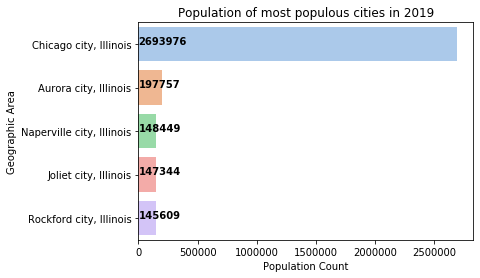

In [25]:
year_city = city.nlargest(5,'2019')['2019']
place_city = city.nlargest(5,'2019')['Geographic Area']
sns.barplot(x=year_city, y=place_city, data=city.nlargest(5,'2019'),palette='pastel')
plt.title('Population of most populous cities in 2019')
plt.xlabel('Population Count')
for i,j in enumerate(city.nlargest(5,'2019')['2019']):
    plt.text(0.5,i, j, weight='bold', color='black')
plt.show()

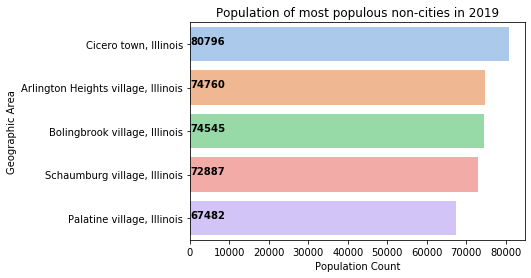

In [26]:
year_non_city = non_city.nlargest(5,'2019')['2019']
place_non_city = non_city.nlargest(5,'2019')['Geographic Area']
sns.barplot(x=year_non_city, y=place_non_city, data=non_city.nlargest(5,'2019'),palette='pastel')
plt.title('Population of most populous non-cities in 2019')
plt.xlabel('Population Count')
for i,j in enumerate(non_city.nlargest(5,'2019')['2019']):
    plt.text(0.5,i, j, weight='bold', color='black')
plt.show()

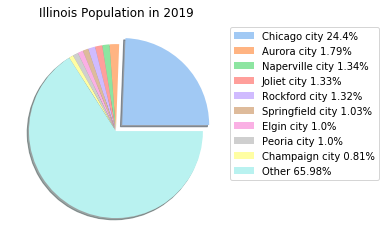

In [27]:
areas = df['Geographic Area'].unique()
year_19 = df['2019']
year_19_series = df.groupby('Geographic Area')['2019'].sum().sort_values(ascending=False)
label = []
pop = []
count = 9
total = 0
percent = 0

for area in year_19_series.index:
    if count > 0:
        percent += np.round(year_19_series[area]/year_19_series.sum()*100,2)
        percent_label = str(np.round(year_19_series[area]/year_19_series.sum()*100,2))+'%'
        label.append(area.split(', ')[0] + ' ' + percent_label)
        pop.append(year_19_series[area])
        count -=1
    else:
        total += year_19_series[area]

label.append('Other' + ' ' + str(np.round(100-percent,2)) + '%')
pop.append(total)
plt.title('Illinois Population in 2019')
plt.pie(pop,explode=(0.1,0,0,0,0,0,0,0,0,0),pctdistance=0.6,colors=sns.color_palette('pastel'),shadow=True)
plt.legend(labels=label,bbox_to_anchor=(1,1))
plt.show()

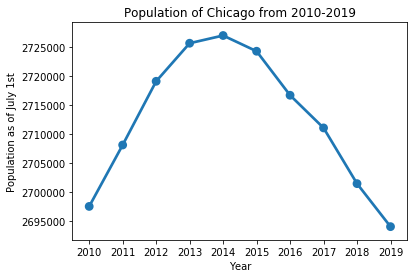

In [28]:
df_top5_19_tmp = df.sort_values(by='2019', ascending=False).head(5)[['Geographic Area','2010','2011','2012','2013','2014','2015','2016','2017','2018','2019']]
df_top5_19 = df_top5_19_tmp.transpose().reset_index().drop(0).infer_objects()
df_top5_19.columns = ['Year','Chicago','Aurora','Naperville','Joliet','Rockford']
sns.pointplot(x='Year',y='Chicago',data=df_top5_19)
plt.title('Population of Chicago from 2010-2019')
plt.ylabel('Population as of July 1st')
plt.show()

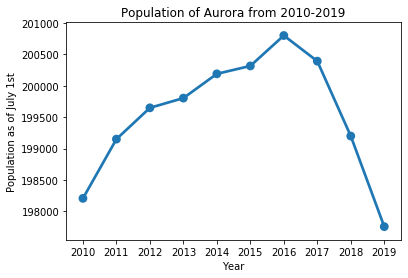

In [29]:
sns.pointplot(x='Year',y='Aurora',data=df_top5_19)
plt.title('Population of Aurora from 2010-2019')
plt.ylabel('Population as of July 1st')
plt.show()

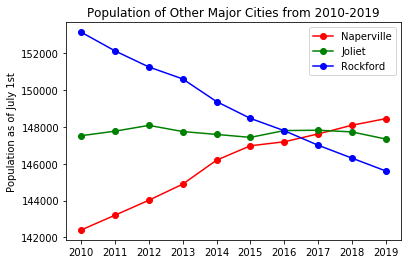

In [30]:
plt.plot_date(x='Year',y='Naperville',data=df_top5_19,color='red',linestyle='-')
plt.plot_date(x='Year',y='Joliet',data=df_top5_19,color='green',linestyle='-')
plt.plot_date(x='Year',y='Rockford',data=df_top5_19,color='blue',linestyle='-')
plt.legend()
plt.title('Population of Other Major Cities from 2010-2019')
plt.ylabel('Population as of July 1st')
plt.show()

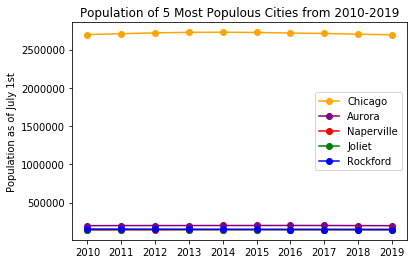

In [31]:
plt.plot_date(x='Year',y='Chicago',data=df_top5_19,color='orange',linestyle='-')
plt.plot_date(x='Year',y='Aurora',data=df_top5_19,color='purple',linestyle='-')
plt.plot_date(x='Year',y='Naperville',data=df_top5_19,color='red',linestyle='-')
plt.plot_date(x='Year',y='Joliet',data=df_top5_19,color='green',linestyle='-')
plt.plot_date(x='Year',y='Rockford',data=df_top5_19,color='blue',linestyle='-')
plt.legend()
plt.title('Population of 5 Most Populous Cities from 2010-2019')
plt.ylabel('Population as of July 1st')
plt.show()

In [58]:
df_top10_19 = df.nlargest(10,'2019')[['Geographic Area','2019']]
df_top10_19['Geographic Area'] = df_top10_19['Geographic Area'].replace(', Illinois',"")
df_top10_19['Latitude'] = [41.8781,41.7606,41.7508,41.5250,42.2711,39.7817,42.0354,40.6936,40.1164,42.3636]
df_top10_19['Longitude'] = [-87.6298,088.3201,88.1535,88.0817,89.0940,89.6501,88.2826,89.5890,88.2434,87.8448]
df_top10_19

,Geographic Area,2019,Latitude,Longitude
219,"Chicago city, Illinois",2693976,41.8781,-87.6298
54,"Aurora city, Illinois",197757,41.7606,88.3201
804,"Naperville city, Illinois",148449,41.7508,88.1535
579,"Joliet city, Illinois",147344,41.5250,88.0817
1002,"Rockford city, Illinois",145609,42.2711,89.0940
1109,"Springfield city, Illinois",114230,39.7817,89.6501
350,"Elgin city, Illinois",110849,42.0354,88.2826
921,"Peoria city, Illinois",110417,40.6936,89.5890
206,"Champaign city, Illinois",88909,40.1164,88.2434
1232,"Waukegan city, Illinois",86075,42.3636,87.8448


## Summary